In [5]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import datasets, layers, models
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
import numpy as np
import random
import keras
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import class_likelihood_ratios, confusion_matrix

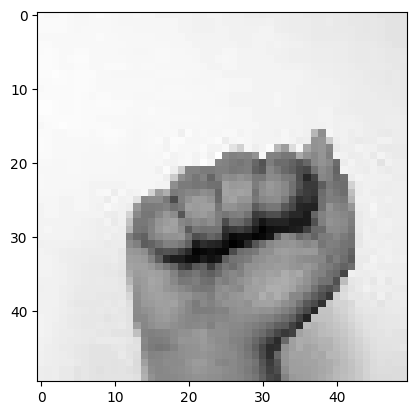

In [6]:
DATADIR ="./Dataset2/"
CATEGORIES = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
# CATEGORIES = ["Bread","Dairy Product","Dessert","Egg","Fried food","Meat","Noodles-Pasta","Rice","Seafood","Soup","Vegetable-Fruit"]

for cat in CATEGORIES:
    path= os.path.join(DATADIR, cat)
    for img in os.listdir(path):

        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [7]:
print(img_array.shape)
IMG_SIZE=60
# new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
# print(new_array.shape)

(50, 50)


In [8]:
training_data=[]

def create_training_data():
    for cat in CATEGORIES:
        path= os.path.join(DATADIR, cat)
        class_num = CATEGORIES.index(cat)
        for img in os.listdir(path):
            try:
                 img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                 new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                 training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [9]:
print(len(training_data))

39000


In [10]:
random.shuffle(training_data)

# print(training_data)
for sample in training_data[:5]:
    print(sample[1])

15
24
13
25
24


In [11]:
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)

In [12]:
import pickle

pickle_out= open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [13]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
y[1]

24

In [14]:
train_X, test_X = train_test_split(X, test_size=0.2, random_state=42)
train_y, test_y = train_test_split(y, test_size=0.2, random_state=42)

In [15]:
from keras.models import Sequential
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [16]:

train_X=train_X/255
test_X=test_X/255


In [58]:
# plt.imshow(train_X[0])
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation= 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers. Dense(26,activation="softmax")


])

opt= keras.optimizers.Adamax()
cnn.compile( optimizer=opt,
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'] )

In [64]:
# cnn.fit(train_X,train_y,epochs=5)

train_y=np.array(train_y)
test_y=np.array(test_y)

history=cnn.fit(train_X,train_y,epochs=1, batch_size=128, validation_data=(test_X, test_y))


244/244 [==============================] - 52s 212ms/step - loss: 0.1447 - accuracy: 0.9575 - val_loss: 0.0781 - val_accuracy: 0.9800


In [65]:
cnn.evaluate(test_X,test_y)
cnn.summary()

244/244 [==============================] - 3s 11ms/step - loss: 0.0781 - accuracy: 0.9800
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 58, 58, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 11, 11, 32)        9248      
                             

1/1 [==============================] - 0s 23ms/step
output is : W


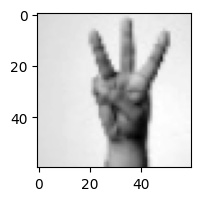

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
rnd=random.randint(0,len(test_y))
plt.figure(figsize=(20,2))
plt.imshow(test_X[rnd,:], cmap="gray")


y_pred=cnn.predict((test_X[rnd,:]).reshape(1,IMG_SIZE,IMG_SIZE))
# print(y_pred)
output= np.argmax(y_pred)
print("output is : " + CATEGORIES[output])

In [67]:
print(test_X.shape)
y_pred=cnn.predict(test_X[:,:])
print(type(test_y))
print(type(y_pred))
# print(y_pred)
print(y_pred.shape)



print(y_pred[0])
print(np.argmax(y_pred[0]))
print(test_y[1,])


y_classes= [np.argmax(element) for element in y_pred]



print(y_classes[0])
n_pred=np.array(y_classes)
print(n_pred.shape)
print(test_y.shape)

classification_report(test_y, n_pred, labels=None, target_names=CATEGORIES)
report_dict =classification_report(test_y, n_pred, labels=None, target_names=CATEGORIES)
print(report_dict)

(7800, 60, 60, 1)
244/244 [==============================] - 3s 11ms/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7800, 26)
[1.7573512e-16 1.9905345e-07 3.1813401e-15 1.0812250e-14 2.0486638e-11
 2.6602399e-11 5.8758451e-17 2.5907721e-18 5.1427959e-13 6.3006848e-18
 3.3369378e-14 2.7726517e-18 1.2680345e-12 1.0849750e-17 5.5535567e-16
 3.8864808e-18 6.1206724e-15 6.4471285e-13 1.9517304e-11 5.5279034e-14
 2.2798351e-13 6.7601774e-14 5.9406741e-10 9.9999976e-01 1.9651355e-12
 1.9014052e-15]
23
3
23
(7800,)
(7800,)
              precision    recall  f1-score   support

           A       0.98      1.00      0.99       311
           B       1.00      1.00      1.00       305
           C       0.99      0.99      0.99       276
           D       0.98      0.95      0.96       302
           E       1.00      1.00      1.00       292
           F       0.96      0.99      0.97       323
           G       1.00      0.91      0.95       293
           H       0.93      0.98      

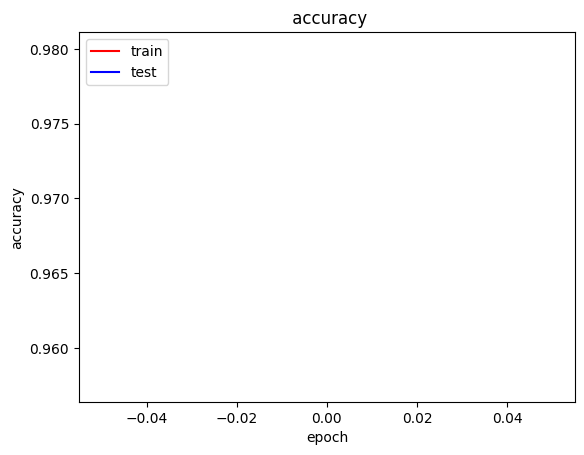

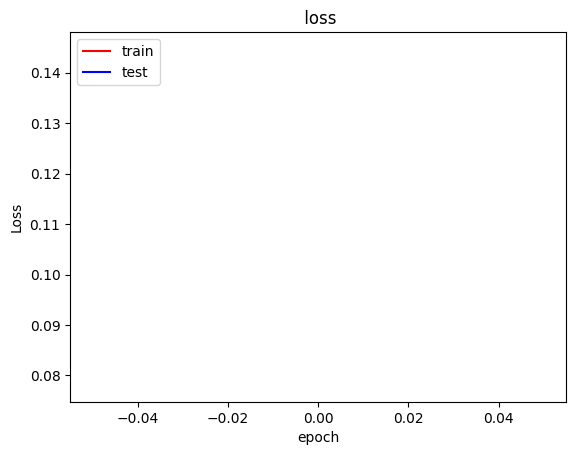

In [68]:


plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title(' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title(' loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
